In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

df = sns.load_dataset('titanic')
df['family'] = df.sibsp+df.parch
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


In [2]:
df.drop(['sibsp','parch','fare','embarked','class','who','adult_male','deck','embark_town','alive','alone'],axis=1,inplace=True)
#df=df.sort_values(by=['survived'],ascending = True)


to_1st = df.loc[df['pclass']==1]# total 1st
to_2nd = df.loc[df['pclass']==2]# total 2nd
to_3rd = df.loc[df['pclass']==3]# total 3rd

to_m = df.loc[df['sex']=='male'] # total male
to_f = df.loc[df['sex']=='female'] # total female

# to_c = df.loc[df['who']=='child'] # total Child

# to_adult_m = df.loc[df['adult_male']==True] # total adult_male

to_alone = df.loc[df['family']==0] # total alone

###################################################

suv = df.loc[df['survived']==1] # 생존자 342명

suv_1st = suv.loc[suv['pclass']==1] # 생존자 중 1st클래스 136명
suv_2nd = suv.loc[suv['pclass']==2] # 87명
suv_3rd = suv.loc[suv['pclass']==3] # 119명

suv_m = suv.loc[suv['sex']=='male']
suv_f = suv.loc[suv['sex']=='female']

# suv_c = suv.loc[suv['who']=='child']

# suv_adult_m = suv.loc[suv['adult_male']==True]

suv_alone = suv.loc[suv['family']==0]


#################################################

data_to = {'class_First':len(suv_1st), 'class_second':len(suv_2nd),'class_third':len(suv_3rd),'male':len(suv_m),
                          'female':len(suv_f),'alone':len(suv_alone),'passenger':len(suv)}
insight_suv= pd.DataFrame(data_to, index = ['Survived'])

data_suv = {'class_First':len(to_1st), 'class_second':len(to_2nd),'class_third':len(to_3rd),'male':len(to_m),
                          'female':len(to_f),'alone':len(to_alone),'passenger':len(df)}
insight_to= pd.DataFrame(data_suv, index = ['Total'])

insight=pd.concat([insight_to,insight_suv])

data_per = round((insight.iloc[1])/(insight.iloc[0]) * 100)
df_p=pd.DataFrame(data_per,columns=['Survived_per'])
insight_per=df_p.T

insight=pd.concat([insight_to,insight_suv,insight_per])
insight











,class_First,class_second,class_third,male,female,alone,passenger
Total,216.0,184.0,491.0,577.0,314.0,537.0,891.0
Survived,136.0,87.0,119.0,109.0,233.0,163.0,342.0
Survived_per,63.0,47.0,24.0,19.0,74.0,30.0,38.0


In [3]:
df

,survived,pclass,sex,age,family
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0
...,...,...,...,...,...
886,0,2,male,27.0,0
887,1,1,female,19.0,0
888,0,3,female,NaN,3
889,1,1,male,26.0,0


In [3]:
def get_catrgory(age):
    cat=''
    if age <= 5: cat='Baby'
    elif age <= 12: cat='Child'
    elif age <=19: cat='Teenager'
    elif age <=35: cat='Young_adult'
    elif age <=60: cat='Adult'
    else: cat='Elderly'
    return cat

df['age_cat'] = df.age.apply(lambda x: get_catrgory(x))
df

,survived,pclass,sex,age,family,age_cat
0,0,3,male,22.0,1,Young_adult
1,1,1,female,38.0,1,Adult
2,1,3,female,26.0,0,Young_adult
3,1,1,female,35.0,1,Young_adult
4,0,3,male,35.0,0,Young_adult
...,...,...,...,...,...,...
886,0,2,male,27.0,0,Young_adult
887,1,1,female,19.0,0,Teenager
888,0,3,female,NaN,3,Elderly
889,1,1,male,26.0,0,Young_adult


In [5]:
# 클래스별 생존율
df[['pclass','survived']].groupby(['pclass']).mean()

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [6]:
# 성별별 생존율
df[['sex','survived']].groupby(['sex']).mean()

,survived
sex,
female,0.742038
male,0.188908


In [8]:
df[['family','survived']].groupby(['family']).mean()

,survived
family,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [9]:
df[['age_cat','survived']].groupby(['age_cat']).mean()

,survived
age_cat,
Adult,0.400000
Baby,0.704545
Child,0.360000
Elderly,0.286432
Teenager,0.410526
Young_adult,0.384384


In [41]:
ttt = df[['age_cat','survived']].groupby(['age_cat']).mean().sum()

survived    2.545888
dtype: float64

In [10]:
from sklearn.preprocessing import LabelEncoder
e_df=df.copy()
le = LabelEncoder()
e_df['sex'] = le.fit_transform(e_df['sex'])
e_df['age_cat'] = le.fit_transform(e_df['age_cat'])
e_df

,survived,pclass,sex,age,family,age_cat
0,0,3,1,22.0,1,5
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,5
3,1,1,0,35.0,1,5
4,0,3,1,35.0,0,5
...,...,...,...,...,...,...
886,0,2,1,27.0,0,5
887,1,1,0,19.0,0,4
888,0,3,0,NaN,3,3
889,1,1,1,26.0,0,5


In [16]:
df[['age_cat','survived']].groupby(['age_cat']).mean()

,survived
age_cat,
Adult,0.400000
Baby,0.704545
Child,0.360000
Elderly,0.286432
Teenager,0.410526
Young_adult,0.384384


In [21]:
df.age_cat.value_counts()

Young_adult    333
Elderly        199
Adult          195
Teenager        95
Baby            44
Child           25
Name: age_cat, dtype: int64

In [8]:
import matplotlib.pyplot as plt

In [24]:
tdf = df.copy()
tdf.drop(['age'],axis=1,inplace=True)
df_c1=tdf.loc[tdf['pclass']==1]
df_c2=tdf.loc[tdf['pclass']==2]
df_c3=tdf.loc[tdf['pclass']==3]
df_c1

,survived,pclass,sex,family,age_cat
1,1,1,female,1,Adult
3,1,1,female,1,Young_adult
6,0,1,male,0,Adult
11,1,1,female,0,Adult
23,1,1,male,0,Young_adult
...,...,...,...,...,...
871,1,1,female,2,Adult
872,0,1,male,0,Young_adult
879,1,1,female,1,Adult
887,1,1,female,0,Teenager


In [28]:
class_g=df_c1.groupby(['pclass','sex','age_cat','family'])
sum_c= class_g.sum()
sum_c

survived
pclass sex    age_cat     family          
1      female Adult       0             11
                          1             14
                          2              9
                          3              1
              Baby        3              0
              Elderly     0              3
                          1              8
              Teenager    0              2
                          1              7
                          2              2
                          3              1
                          4              1
              Young_adult 0             17
                          1             10
                          2              2
                          3              0
                          4              1
                          5              2
       male   Adult       0              9
                          1              7
                          2              3
                          3              1
              Baby        2              1
                          3              1
              Child       3              1
              Elderly     0              6
                          1              0
                          2              0
                          5              0
              Teenager    1              0
                          2              1
                          5              0
              Young_adult 0             10
                          1              5
                          2              0

<AxesSubplot:xlabel='pclass,sex,age_cat,family'>

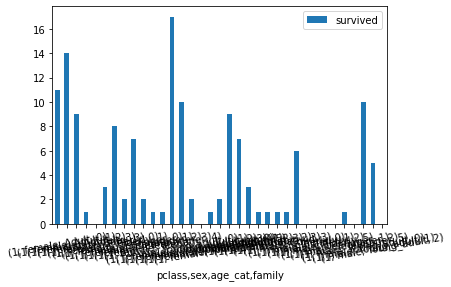

In [27]:
class_g=df_c1.groupby(['pclass','sex','age_cat','family'])
sum_c= class_g.sum()
sum_c.plot(kind='bar',rot = 10)

In [20]:
class_g=tdf.groupby(['pclass','sex','age_cat','family'])
sum_c= class_g.sum()

<AxesSubplot:xlabel='pclass,sex,age_cat,family'>

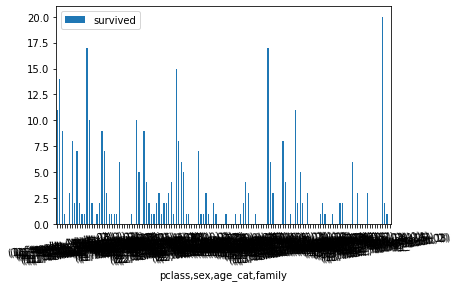

In [12]:
tdf = df.copy()
tdf.drop(['age'],axis=1,inplace=True)
class_g=tdf.groupby(['pclass','sex','age_cat','family'])
sum_c= class_g.sum()
sum_c.plot(kind='bar',rot = 10)

<AxesSubplot:xlabel='pclass,sex,age_cat,family'>

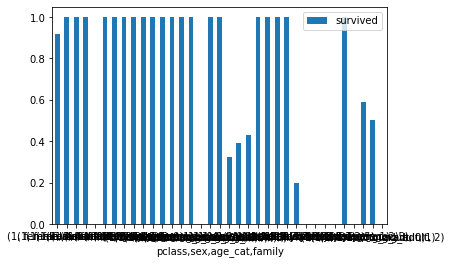

In [29]:
avg_c=class_g.mean()
avg_c.plot(kind='bar',rot = 0)